# Homework Assignment 3 (Individual)

---

### <p style="text-align: right;"> &#9989; Sarah Koehler


---
## Creating a natural selection model using ABMs and OOP

In this homework, we have two sections.

- **Part A: Git practice**
- **Part B: ABM + OOP: Simulating animal populations -- Natural selection and adaptation**

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/rock_mice.jpg" border="0" align="center" width="600">
image found online.


### Goal for this homework assignment
By now, you have learned ABM and OOP through the assignments of assembling Zoo and Superbugs. Let's use those skills to build a simple fun model of natural selection. 

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, March 31.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3, as well as GitHub turn-in repo.  Submission instructions can be found at the end of the notebook. **The distribution of points can be found in the section headers**.


---
## Part 0: Upload this file to your Git repository to track your progress on your assignment (15 pt)

#### Note: This is different from previous assignments!

You will add this homework assignment to your GutHub repository you created for previous homework so that you can track your progress on the assignment and preserve the final version that you turn in. We also want you to get practice with **branching**, as that will be important and useful for your group projects. 

**&#9989; Do the following**:


1. Navigate to your `cmse202-s23-turnin` repository 
2. Create a new branch called `hw03_branch` and move into it. 
3. Create a new directory called `hw-03`.
4. Move this notebook into that **new directory**, then **add** and **commit** it. 
5. Finally, to test that everything is working, `git push` the file and new branch so they end up in your GitHub repository. 

**Important**: Make sure to add your Professor and TA as collaborators of this respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the `cmse202-s23-turnin` repository inside the `hw-03` directory and `hw-03` branch that you just created.  Periodically, **you'll be asked to commit your changes and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It will be good to develop a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.



---

# A natural selection model
For this homework assignment, you will be building an Agent-Based Model (ABM) that simulates natural selection in action. You will build two classes for mice, which inhabit the world, and one class for a (predator) hawk. The mice have different fur color, which allows them to blend in better (or worse) with their environment. This model is (loosely) based on an actual case of natural selection involving the [Peppered Moth](https://en.wikipedia.org/wiki/Peppered_moth_evolution).

For this assignment, you will be working with an environment class, which will allow you to actually run your simulation. We've also provided you with a generic `Animal_Agent`, which you will use to build your own classes for the natural selection model. You will need to download the generic `Animal_Agent` class and `Environment` class. You can find them here:

- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Animal_Agent_Class.py`
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Environment.py`

## 1. Building Up an Environment with Animal Agents



### 1.1 (5 Points)

Spend some time exploring the new classes a bit. **Write a few sentences giving a high-level description of how this model works. What are the different classes? What do they do? How can they be used to create an Agent-Based Model?**


The Environment class sets up the environment for the model where it uses its methods to simulate the ongoing predator-prey situation. The Environment class uses the Animal_Agent class objects to simulate the predator-prey environment by calling the Animal_Agent methods to have the animals move, age, and interact with each other. The Environment class also has a method to plot the current evironment situation. Animal_Agent objects can be predator or prey, where the predators are killing the prey and the prey can reproduce. The Animal_Agent objects can move around the board and have methods to determine whether they are dead, near another Animal_Agent object, and create new Animal_Agent objects as way to simulate procreation. These two classes create an Agent-Based Model since the Animal_Agents are used in the Environment object which allows the animals to interact and simulate the predator-prey situation since the Animal_Agent objects can move around, age, reproduce, and die.

### 1.2 (15 Points)

Construct a new `Environment` object and a new `Animal_Agent` object. Specify that the `Animal_Agent` object is a female. Add the `Animal_Agent` object to the `Environment` object. Run the `simulation` method. You should see there's a bug in the code. **Fix the bug and explain what the cause was.**

In [1]:
import Animal_Agent_Class
from Animal_Agent_Class import Animal_Agent
import Environment
from Environment import Environment

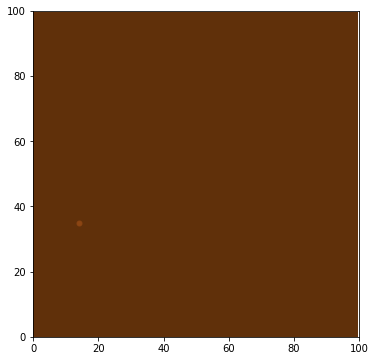

In [2]:
#Write your code here
environment1 = Environment()
animal1 = Animal_Agent(sex="F")
environment1.add_agent(animal1)
environment1.simulate(10)

The issue is that there is a list and integer value that are trying to be subtracted which is not possible. The thing that caused this bug is that when the procreate function is called in the environment class simulate function, the two arguments are in the wrong order. The procreate function has the arguments of self, all_agents, and time. In the simulate function, the procreate function was called with the time argument before the all_agents argument. To fix this issue, I switched the arguments to be called in the correct order when procreate is called in the simulate function. 

### 1.3 (5 Points)

**In the cell below, copy your `simulation` code from above and rerun it with the bug fixed to show how the animal runs around.** You should use the `set_allele()` method in the `Animal_Agent` class to randomly assign two alleles to your `Animal_Agent` object.


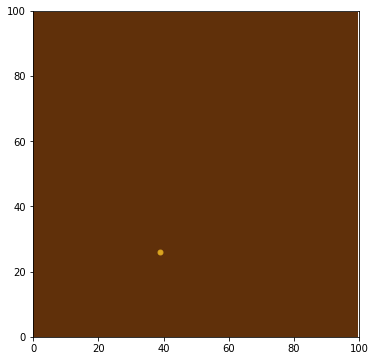

In [3]:
#Write your code here
animal1.set_allele(0, 1)
environment1.simulate(20)


### 1.4 (5 Points)

**Now add in a predator and let it evolve. Do you see the predator hunting the prey object?** Make sure to set the `ptype` to predator, and the `shape` and `color` to be something different from the prey you defined above (E.g., a shape of "P" and a color of "red".)

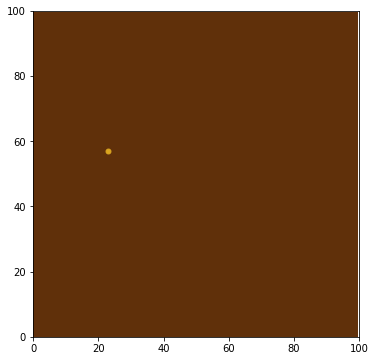

In [4]:
#Write your code here
predator1 = Animal_Agent(ptype="Predator", shape='P', color='red')
environment1.add_agent(predator1)
environment1.simulate(15)

### 1.5 (15 Points)

**Now add *multiple* predator and prey agents ($N > 1$ for both). Find a combination of $N_{\mathrm{Prey}}$ and $N_{\mathrm{Predator}}$ where the Prey can maintain a sustainable population (I.e., they aren't wiped out in the long run).**

- **NOTE 1:** Make sure you add both male and female Prey, so they can `Procreate`. 
- **NOTE 2:** We recommend using the `simulate_plot_populations()` method, so you can monitor the growth/decline of populations.

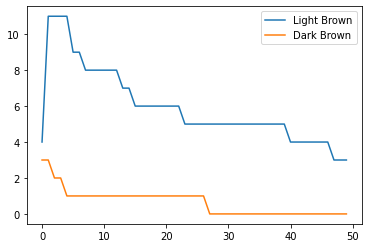

In [5]:
#Write your code here
prey1 = Animal_Agent(sex="F")
prey1.set_allele(1,1)
prey2 = Animal_Agent()
prey2.set_allele(0,0)
prey3 = Animal_Agent()
prey3.set_allele(0,1)
prey4 = Animal_Agent(sex="F")
prey4.set_allele(0,0)
prey5 = Animal_Agent()
prey5.set_allele(1,1)
prey6 = Animal_Agent(sex = "F")
prey6.set_allele(0,0)
predator2 = Animal_Agent(ptype = 'Predator', shape = 'P', color = 'red')
predator3 = Animal_Agent(ptype = 'Predator', shape = 'P', color = 'red')
predator4 = Animal_Agent(ptype = 'Predator', shape = 'P', color = 'red')

environment1.add_agent(prey1)
environment1.add_agent(prey2)
environment1.add_agent(prey3)
environment1.add_agent(prey4)
environment1.add_agent(prey5)
environment1.add_agent(prey6)
environment1.add_agent(predator2)
environment1.add_agent(predator3)
environment1.add_agent(predator4)

environment1.simulate_plot_populations(50)

### 1.6 (5 Points)

**How does the population evolve over time? (I.e., is it linear? Periodic? etc.) What causes this shape? How does the population of light brown and dark brown prey differ (if at all)?**

The population of the prey is periodic because it will have periods of increase/decrease and then have periods where the population stays constant. This is caused due to the prey being able to procreate which will cause an increase in the population assuming no prey die at the same time. Also, since the predators are searching for the prey, it is not guaranteed that at least one prey is found by the predator at each time so there will be times where the population doesn't change and then there will be the times where the predators do find the prey and the prey population will decrease. At the beginning the population of light brown prey increases quickly as the prey procreate. The dark brown prey population never increases and this makes sense because the dark brown prey is a recessive gene so the chance of more dark brown prey being reproduced is not high. The light brown population has more decreases in the population but this is because there are more light brown prey than dark brown prey. The dark brown prey population eventually dies out because they are easier to be seen by the predators and will be caught more often. The light brown prey population continues to decrease but still has living prey.

## 2. Refining the Model

For this part, we're going to use our generic `Animal_Agent`class to construct child classes that represent *specific* animal species for both our predator and prey animals. Specifically, we'll be making a `Mouse` child class for the prey and a `Hawk` child class for the predator. **We'll use these new child classes to run our natural selection model.**

### 2.1 (15 Points)

Create a new `Mouse` child class, using the `Animal_Agent` as the parent class. The `Mouse` class will largely be the same as the `Animal_Agent` class except for two details: 

1. **In the `set_allele` method, add a new class attribute called `catch_probability`. For the light-brown mice, set `catch_probability` to 0.95. For dark brown mice, set the `catch_probability` to 0.05.**
2. **Change the `Procreate` method so that they create new `Mouse` animal objects.**



In [ ]:
#Write your code here

### 2.2 (10 Points)

Create a new `Hawk` child class, using the `Animal_Agent` as the parent class. The `Hawk` class will largely be the same as the `Animal_Agent` class except for one detail: **In the `hunt` method, incorporate the `catch_probability` of the predator, such that it is harder for a `Hawk` to catch a `Mouse` with a lower `catch_probability`.**

In [ ]:
#Write your code here

### 2.3 (5 Points)

**Repeat problem 1.5, replacing the generic prey with the `Mice` animals, and the generic predators with the `Hawk` animals.**

In [ ]:
#Write your code here

### 2.4 (5 Points)

**Describe the differences between your results using the `Hawk` and `Mouse` class and the results from part 1.5. If and how does this model capture the effects of natural selection?**

*Write your response below*

---
### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

## Git push, and then merge your `hw03_branch` into your `main` branch.